<h1 align='center'> CS353 Machine Learning Lab</h1>
<h1 align='center'>Endsem-09/04/21</h1>
<h2 align='center'>Shumbul Arifa (181CO152)</h2>

# Task:
To design and train a perceptron training for EX-OR gate.

### XOR logic gate

If the input is the same(0,0 or 1,1), then the output will be 0, otherwise(0,1 or 1,0) 1.

| a | b | a^b |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |



## Import libraries

In [11]:
import numpy as np
from matplotlib import pyplot as plt

## Activation function

In [12]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
#     print("Sigmoid of \n", x, " = ", z, "\n")
    return z

def sigmoid_derivative(x):
    z = x * (1 - x)
    return z

## Initialising weight using ```np.rand``` 



In [13]:
def initializeParameters(inputFeatures, HiddenLayer, outputFeatures):
    W1 = np.random.randn(HiddenLayer, inputFeatures)
    W2 = np.random.randn(outputFeatures, HiddenLayer)
    b1 = np.zeros((HiddenLayer, 1))
    b2 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1, "W2" : W2, "b2": b2}
    return parameters
  

## Forward Propogation

In [14]:
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
  
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
  
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

**Class entropy error function = -ylog(y') - (1-y)log(1-y')** \
y -> actual output \
y' -> predicted output

## Backward Propogation

In [15]:
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
      
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
      
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
      
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

## Weight Updation

In [16]:
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Training

In [17]:
# Model to learn the XOR truth table 
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output
  
# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Analysis

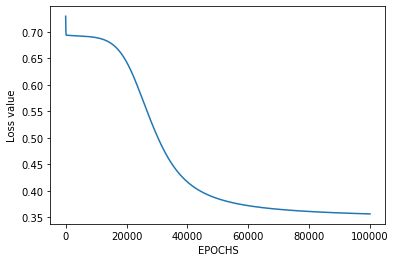

In [18]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing the perceptron model

In [19]:
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)

[[1. 1. 0. 0.]]


**Tabular Output:**



| a | b | a^b |
| --- | --- | --- |
| 1 | 0 | 1 |
| 1 | 1 | 0 |
| 0 | 0 | 0 |
| 0 | 1 | 1 |


We observe that the predicted outputs for each of the test inputs are matched with the EX-OR logic gate truth table. Hence, it is verified that the perceptron algorithm for XOR logic gate is correctly implemented.